**Web Scraper to extract top 1000 movies in IMDB dataset**

Web scraping, also known as web data extraction, is the process of retrieving or “scraping” data from a website

In the project, the webscraper will explore the data on IMDB most popular movies and extract columns such as Rank, Title, Score and Gross values using tools such Beautiful Soup, Pandas, Numpy and Requests



In [0]:
#Loading the necessary Libraries
import requests
from requests import get
import csv
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from time import sleep
from random import randint

WebScraper:

The IMDB page is using the URL https://www.imdb.com/search/title/?groups=top_1000&start=1  as its main structure with each page adding values of 50 to Start

By Looping through a list of these values it is possible to explore all the pages in the IMDB dataset. Below is an image of the IMDB website

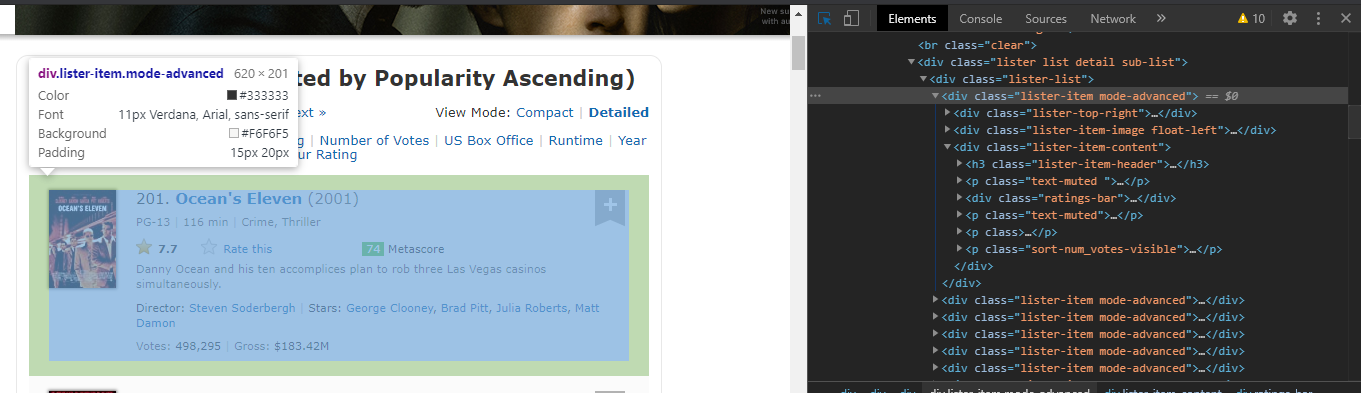



In [0]:
#Define the website URL
#imdb_base = "https://www.imdb.com/search/title/?groups=top_1000&ref_=adv_prv"

#Header file
hdr = {"Accept-Language": "en-US,en;q=0.5"}

#The pages in IMDB are number 1,51,1001 etc. 
pages = np.arange(1, 1001, 50)

#Dictionary to store all values
movie_dict = {'Rank':[],'Title':[], 'Year':[], 'Duration':[],'Certificate':[],'Genre':[], 'Imdb_ratings':[],'Metascores':[],'Votes':[],'US_gross':[]}


for page in pages:
  content = requests.get("https://www.imdb.com/search/title/?groups=top_1000&start=" + str(page), headers=hdr)
  #Loading using Beautiful Soup

  soup = BeautifulSoup(content.text, 'html.parser')
  right_class=soup.find_all('div', class_='lister-item mode-advanced')

  sleep(randint(2,10))
    #Iterating across all movies present
    #Each item has an If function that adds a value of NA in case the scraper is unable to find the element

  for item in right_class:
    try:
        #Load the Rank of the movie
      rk=item.find("h3", class_="lister-item-header").find("span",class_="lister-item-index").text if item.find("h3", class_="lister-item-header").find("span",class_="lister-item-index") else 'NA'
      movie_dict['Rank'].append(rk)
    except Exception as e:
      print(str(e))

    try:
        #Load the name of the movie
      name=item.find("h3", class_="lister-item-header").find("a").text if item.find("h3", class_="lister-item-header").find("a") else 'NA'
      movie_dict['Title'].append(name)
    except Exception as e:
      print(str(e))

    try:
      #Load the Year of the movie
      year=item.find("h3", class_="lister-item-header").find("span",class_="lister-item-year").text if item.find("h3", class_="lister-item-header").find("span",class_="lister-item-year") else 'NA'
      movie_dict['Year'].append(year)
    except Exception as e:
      print(str(e))

    try:
      #Load the Duration of the movie
      time=item.find("p", class_="text-muted").find("span",class_="runtime").text if item.p.find('span', class_='runtime') else 'NA'
      movie_dict['Duration'].append(time)
    except Exception as e:
      print(str(e))

    try:
      #Load the Certificate of the movie
      cert=item.find("p", class_="text-muted").find("span",class_="certificate").text if item.find("p", class_="text-muted").find("span",class_="certificate") else 'NA'
      movie_dict['Certificate'].append(cert)
    except Exception as e:
      print(str(e))

    try:
      #Load the Genre of the movie
      gen=item.find("p", class_="text-muted").find("span",class_="genre").text if item.find("p", class_="text-muted").find("span",class_="genre") else 'NA'
      movie_dict['Genre'].append(gen)
    except Exception as e:
      print(str(e))

    try:
      #Load the Imdb_ratings of the movie
      rat=item.find("div", class_="ratings-bar").find("strong").text if item.find("div", class_="ratings-bar").find("strong") else 'NA'
      movie_dict['Imdb_ratings'].append(rat)
    except Exception as e:
      print(str(e))

    try:
      #Load the Metascores of the movie
      meta=item.find("div", class_="ratings-bar").find("span",class_="metascore").text if item.find("div", class_="ratings-bar").find('span', class_='metascore') else 'NA'
      movie_dict['Metascores'].append(meta)
    except Exception as e:
      print(str(e))

    try:
      #Load the Votes for the movie
      nv = item.find_all('span', attrs={'name': 'nv'})
      vote = nv[0].text if len(nv) > 0 else 'NA'
      movie_dict['Votes'].append(nv[0].text)

      grosses = nv[1].text if len(nv) > 1 else 'NA'
      movie_dict['US_gross'].append(grosses)

    except Exception as e:
      print(str(e))


Loading the data into Pandas DataFrame

In [0]:

df = pd.DataFrame(movie_dict)


In [0]:
df.head()


,Rank,Title,Year,Duration,Certificate,Genre,Imdb_ratings,Metascores,Votes,US_gross
0,1.,Joker,(2019),122 min,R,"\nCrime, Drama, Thriller",8.5,59,"796,823",$335.45M
1,2.,Once Upon a Time... in Hollywood,(2019),161 min,R,"\nComedy, Drama",7.7,83,"470,782",$142.50M
2,3.,Parasite,(2019),132 min,R,"\nComedy, Drama, Thriller",8.6,96,"414,458",$53.37M
3,4.,The Gentlemen,(2019),113 min,R,"\nAction, Comedy, Crime",7.9,51,"139,046",NA
4,5.,Avengers: Endgame,(2019),181 min,PG-13,"\nAction, Adventure, Drama",8.4,78,"721,764",$858.37M


In [0]:
#Replacing the NA values with NAN values to ensure data frame understands the records   
df = df.replace('NA', np.NaN)

In [0]:
#Exploring the number of null records
df.isnull().sum()

Rank              0
Title             0
Year              0
Duration          0
Certificate      13
Genre             0
Imdb_ratings      0
Metascores      167
Votes             0
US_gross        160
dtype: int64

In [0]:
#Viewing the rows having null values
null_columns=df.columns[df.isnull().any()]

print(df[df.isnull().any(axis=1)].head())

     Rank                       Title    Year  ...  Metascores    Votes US_gross
3      4.               The Gentlemen  (2019)  ...  51          139,046      NaN
29    30.                The Irishman  (2019)  ...  94          291,150      NaN
42    43.  Portrait of a Lady on Fire  (2019)  ...  95           38,887      NaN
96    97.              Marriage Story  (2019)  ...  94          213,812      NaN
153  154.         The Invisible Guest  (2016)  ...         NaN  118,842      NaN

[5 rows x 10 columns]


The data set has various characters that needs to updated/removed to make the data more usable.

Transformation of Data

In [0]:
df.head()

#Update the '\n in Genre' with replace function
df['Genre'] = df['Genre'].str.replace('\n','')

#Removing the brackets before and after years
df['Year']=df['Year'].str[-5:-1]
#The errors='coerce' is used to handle errors related to Null Values
df['Year'] = pd.to_numeric(df['Year'],errors='coerce')

#Exctracting the Duration alone
df['Duration'] = df['Duration'].str.replace(' min','').astype(int)

#removing the , in Votes
df['Votes'] = df['Votes'].str.replace(r'\D+', '')
df['Votes'] = pd.to_numeric(df['Votes'],errors='coerce')

#Extracting numeric value of the column
df['US_gross'] =df['US_gross'].map(lambda x : x.lstrip('$').rstrip('M'))
df['US_gross']=pd.to_numeric(df['US_gross'],errors='coerce')

#Renaming the columns
df.rename(columns={"US_gross":"US_gross in Millions","Duration":"Duration in Mins"})

#df.Year.value_counts()



,Rank,Title,Year,Duration,Certificate,Genre,Imdb_ratings,Metascores,Votes,US_gross in Millions
0,1.,Joker,2019,122,R,"Crime, Drama, Thriller",8.5,59,796823,335.45
1,2.,Once Upon a Time... in Hollywood,2019,161,R,"Comedy, Drama",7.7,83,470782,142.50
2,3.,Parasite,2019,132,R,"Comedy, Drama, Thriller",8.6,96,414458,53.37
3,4.,The Gentlemen,2019,113,R,"Action, Comedy, Crime",7.9,51,139046,NaN
4,5.,Avengers: Endgame,2019,181,PG-13,"Action, Adventure, Drama",8.4,78,721764,858.37
...,...,...,...,...,...,...,...,...,...,...
995,996.,C.R.A.Z.Y.,2005,127,Not Rated,"Comedy, Drama",7.9,81,30919,NaN
996,997.,Boy A,2007,102,R,Drama,7.6,75,36276,0.11
997,998.,Vizontele,2001,110,NA,"Comedy, Drama",8.0,NA,31645,NaN
998,999.,The Breath,2009,128,NA,"Action, Drama, Thriller",8.0,NA,30923,NaN


In [0]:
#Updating the datatype of records
df['Imdb_ratings']=df['Imdb_ratings'].astype(float)
df['Metascores']=pd.to_numeric(df['Metascores'],errors='coerce')


In [0]:
df.describe()

,Year,Duration,Imdb_ratings,Metascores,Votes,US_gross
count,1000.000000,1000.000000,1000.000000,833.000000,1.000000e+03,840.000000
mean,1991.002000,122.281000,7.943900,77.639856,2.650846e+05,68.770988
std,23.064604,27.859867,0.277452,12.463502,3.137795e+05,109.315878
min,1920.000000,45.000000,7.600000,28.000000,2.501500e+04,0.000000
25%,1976.000000,102.000000,7.700000,70.000000,5.414575e+04,3.875000
50%,1998.500000,119.000000,7.900000,79.000000,1.353870e+05,24.710000
75%,2009.000000,136.000000,8.100000,87.000000,3.622412e+05,83.130000
max,2019.000000,321.000000,9.300000,100.000000,2.244333e+06,936.660000
